Uncover the factors that lead to employee attrition and explore important questions such as:
1. Show me a breakdown of distance from home by job role and attrition.
2. Compare average monthly income by education and attrition.

In [2]:
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

1. Show me a breakdown of distance from home by job role and attrition.

In [6]:
df1 = df[['Attrition', 'DistanceFromHome', 'JobRole', 'Education', 'MonthlyIncome']]

In [7]:
df1

,Attrition,DistanceFromHome,JobRole,Education,MonthlyIncome
0,Yes,1,Sales Executive,2,5993
1,No,8,Research Scientist,1,5130
2,Yes,2,Laboratory Technician,2,2090
3,No,3,Research Scientist,4,2909
4,No,2,Laboratory Technician,1,3468
...,...,...,...,...,...
1465,No,23,Laboratory Technician,2,2571
1466,No,6,Healthcare Representative,1,9991
1467,No,4,Manufacturing Director,3,6142
1468,No,2,Sales Executive,3,5390


In [8]:
df_yes_attrition = df1[['DistanceFromHome', 'JobRole', 'Attrition']][df1['Attrition'] == 'Yes']
df_no_attrition = df1[['DistanceFromHome', 'JobRole', 'Attrition']][df1['Attrition'] == 'No']

In [9]:
df_yes_attrition = df_yes_attrition.rename(columns = {'Attrition':'Attrition_Yes'})
df_no_attrition = df_no_attrition.rename(columns = {'Attrition':'Attrition_No'})

In [10]:
df_yes_attrition

,DistanceFromHome,JobRole,Attrition_Yes
0,1,Sales Executive,Yes
2,2,Laboratory Technician,Yes
14,24,Laboratory Technician,Yes
21,9,Sales Representative,Yes
24,6,Research Scientist,Yes
...,...,...,...
1438,9,Sales Representative,Yes
1442,1,Research Scientist,Yes
1444,7,Laboratory Technician,Yes
1452,1,Sales Executive,Yes


In [11]:
df_no_attrition

,DistanceFromHome,JobRole,Attrition_No
1,8,Research Scientist,No
3,3,Research Scientist,No
4,2,Laboratory Technician,No
5,2,Laboratory Technician,No
6,3,Laboratory Technician,No
...,...,...,...
1465,23,Laboratory Technician,No
1466,6,Healthcare Representative,No
1467,4,Manufacturing Director,No
1468,2,Sales Executive,No


In [12]:
df_yes_attrition.groupby(['DistanceFromHome', 'JobRole']).count()

Attrition_Yes
DistanceFromHome JobRole                                 
1                Human Resources                        1
                 Laboratory Technician                  4
                 Manufacturing Director                 1
                 Research Scientist                     7
                 Sales Executive                        6
...                                                   ...
29               Healthcare Representative              1
                 Laboratory Technician                  1
                 Manager                                1
                 Research Scientist                     1
                 Sales Executive                        1

[112 rows x 1 columns]

In [13]:
df_no_attrition.groupby(['DistanceFromHome', 'JobRole']).count()

Attrition_No
DistanceFromHome JobRole                                
1                Healthcare Representative            23
                 Human Resources                       8
                 Laboratory Technician                27
                 Manager                              13
                 Manufacturing Director               23
...                                                  ...
29               Manager                               3
                 Manufacturing Director                4
                 Research Scientist                    3
                 Sales Executive                       4
                 Sales Representative                  1

[217 rows x 1 columns]

Alternatively, using the dummy endoding technique within the pandas library:

In [14]:
df_yes_attrition = df1[['DistanceFromHome', 'JobRole', 'Attrition']]

In [15]:
df_yes_attrition

,DistanceFromHome,JobRole,Attrition
0,1,Sales Executive,Yes
1,8,Research Scientist,No
2,2,Laboratory Technician,Yes
3,3,Research Scientist,No
4,2,Laboratory Technician,No
...,...,...,...
1465,23,Laboratory Technician,No
1466,6,Healthcare Representative,No
1467,4,Manufacturing Director,No
1468,2,Sales Executive,No


In [16]:
df_no_attrition

,DistanceFromHome,JobRole,Attrition_No
1,8,Research Scientist,No
3,3,Research Scientist,No
4,2,Laboratory Technician,No
5,2,Laboratory Technician,No
6,3,Laboratory Technician,No
...,...,...,...
1465,23,Laboratory Technician,No
1466,6,Healthcare Representative,No
1467,4,Manufacturing Director,No
1468,2,Sales Executive,No


In [17]:
df_no_attrition = pd.get_dummies(df_yes_attrition.Attrition, prefix = 'Attrition', prefix_sep = '_')

In [18]:
df_yes_attrition = pd.concat([df_yes_attrition, df_no_attrition], axis = 1)

In [19]:
df_yes_attrition = df_yes_attrition.drop('Attrition', 1)

In [20]:
df_yes_attrition

,DistanceFromHome,JobRole,Attrition_No,Attrition_Yes
0,1,Sales Executive,0,1
1,8,Research Scientist,1,0
2,2,Laboratory Technician,0,1
3,3,Research Scientist,1,0
4,2,Laboratory Technician,1,0
...,...,...,...,...
1465,23,Laboratory Technician,1,0
1466,6,Healthcare Representative,1,0
1467,4,Manufacturing Director,1,0
1468,2,Sales Executive,1,0


In [21]:
df_no_attrition = df_yes_attrition.groupby(['DistanceFromHome', 'JobRole']).sum()

In [22]:
df_no_attrition

Attrition_No  Attrition_Yes
DistanceFromHome JobRole                                               
1                Healthcare Representative            23              0
                 Human Resources                       8              1
                 Laboratory Technician                27              4
                 Manager                              13              0
                 Manufacturing Director               23              1
...                                                  ...            ...
29               Manager                               3              1
                 Manufacturing Director                4              0
                 Research Scientist                    3              1
                 Sales Executive                       4              1
                 Sales Representative                  1              0

[224 rows x 2 columns]

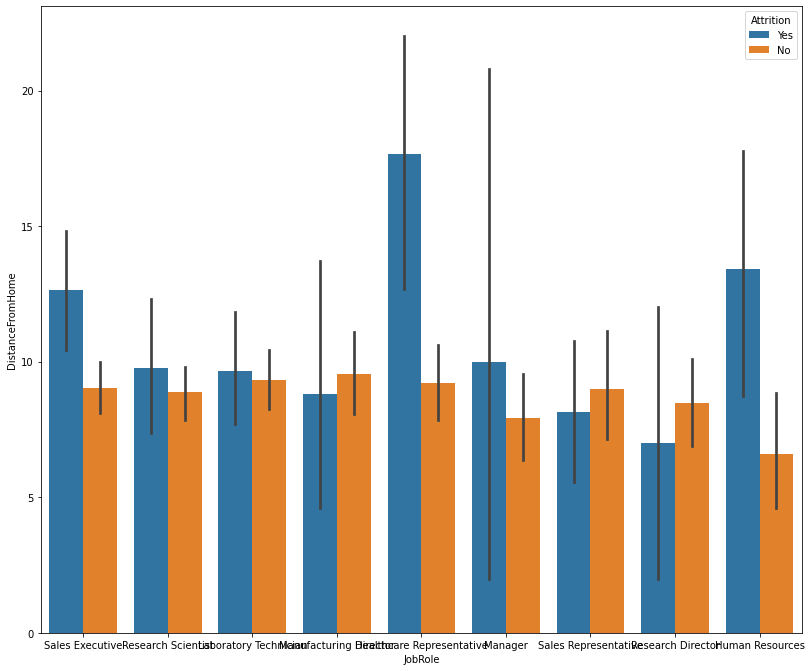

In [44]:
columns=['JobRole']
plt.figure(figsize=(30,3))
j=0
j+=1
plt.subplot(1,2,j)
sns.barplot(x='JobRole',y='DistanceFromHome',hue='Attrition',data=df)
plt.subplots_adjust(bottom=-0.9,top=2)
plt.show()

A bargraph showing the correlation of distance from home by Jobrole and attrition. 

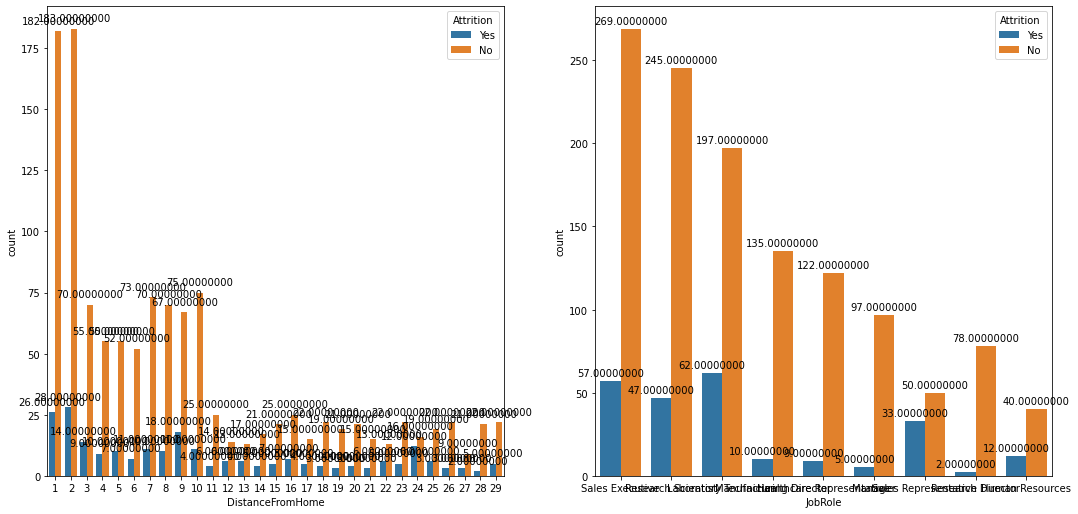

In [46]:
columns=['DistanceFromHome','JobRole']
plt.figure(figsize=(18,10))
j=0
for i in columns:
    j +=1
    plt.subplot(4,2,j)
    #sns.countplot(df[i])
    ax1 = sns.countplot(data=df,x= i,hue="Attrition")
    if(j==8 or j== 7):
        plt.xticks( rotation=90)
    for p in ax1.patches:
        height = p.get_height()
        ax1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                 '{:1.8f}'.format(height,0),
                ha="center",rotation=0)
                 

# Custom the subplot layout
plt.subplots_adjust(bottom=2, top=5)
plt.show()

2. Compare average monthly income by education and attrition.

In [56]:
df1['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [57]:
df5 = df1[['Education', 'MonthlyIncome', 'Attrition']]

In [58]:
df6 = df5.groupby(['Education', 'Attrition']).mean()

In [59]:
df6

MonthlyIncome
Education Attrition               
1         No           5926.129496
          Yes          4360.161290
2         No           6586.058824
          Yes          4282.545455
3         No           6882.919662
          Yes          4770.242424
4         No           7087.814706
          Yes          5335.155172
5         No           8559.906977
          Yes          5850.200000

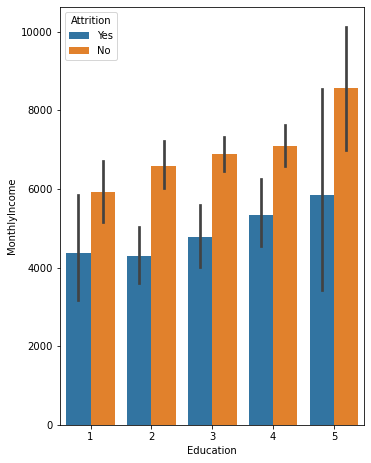

In [65]:
columns=['Education']
plt.figure(figsize=(12,2))
j=0
j+=1
plt.subplot(1,2,j)
sns.barplot(x='Education',y='MonthlyIncome',hue='Attrition',data=df)
plt.subplots_adjust(bottom=-0.9,top=2)
plt.show()

Bar graph showing the comparison of the monthlyincome by education and attrition